# _EMC²_ Demo Notebook

In this notebook we show an example of how to run $EMC^2$ using ModelE3 climate model output and high spectral resolution lidar (HSRL) data, and demonstrate some of the framework's plotting capabilities.

In [1]:
import emc2
import matplotlib.dates as mdates

First, we load model data (in this case, ModelE3) using the ModelE subclass object

In [2]:
model_path = 'allsteps.allmergeSCM_AWARE_788.nc'
my_model = emc2.core.model.ModelE(model_path)

After that, we load in the HSRL data using the HSRL subclass object.

In [3]:
HSRL = emc2.core.instruments.HSRL('nsa')
HSRL.read_arm_netcdf_file('awrhsrlM1.20160816.100000.nc')  # raw or processed ARM or ARM-like data file

In [4]:
HSRL.ds

<xarray.Dataset>
Dimensions:                                (time: 120, mean_time: 120,
                                            altitude: 334, profile_time: 1)
Coordinates:
  * time                                   (time) datetime64[ns] 2016-08-16T1...
  * mean_time                              (mean_time) object 2016-08-16 10:0...
  * altitude                               (altitude) float32 0.0 ... 9.99e+03
Dimensions without coordinates: profile_time
Data variables: (12/26)
    base_time                              object ...
    first_time                             object ...
    last_time                              object ...
    latitude                               (time) float32 dask.array<chunksize=(120,), meta=np.ndarray>
    longitude                              (time) float32 dask.array<chunksize=(120,), meta=np.ndarray>
    od                                     (time, altitude) float32 dask.array<chunksize=(120, 334), meta=np.ndarray>
    ...                                     ...
    profile_beta_a_backscat_parallel       (profile_time, altitude) float32 dask.array<chunksize=(1, 334), meta=np.ndarray>
    beta_a_backscat_perpendicular          (time, altitude) float32 dask.array<chunksize=(120, 334), meta=np.ndarray>
    profile_beta_a_backscat_perpendicular  (profile_time, altitude) float32 dask.array<chunksize=(1, 334), meta=np.ndarray>
    beta_a_backscat                        (time, altitude) float32 dask.array<chunksize=(120, 334), meta=np.ndarray>
    profile_beta_a_backscat                (profile_time, altitude) float32 dask.array<chunksize=(1, 334), meta=np.ndarray>
    qc_mask                                (time, altitude) float64 dask.array<chunksize=(120, 334), meta=np.ndarray>
Attributes: (12/94)
    dpl_py_template:                                                         ...
    dpl_py_template_version:                                                 ...
    time_zone:                                                               ...
    codeversion:                                                             ...
    codedate:                                                                ...
    hsrl_instrument:                                                         ...
    ...                                                                                   ...
    hsrl_processing_parameter__wfov_corr__window_durration:                  ...
    hsrl_processing_parameter__wfov_corr__z_norm_interval:                   ...
    _file_dates:                                                             ...
    _file_times:                                                             ...
    _datastream:                                                             ...
    _arm_standards_flag:                                                     ...

The following command will generate and process 8 subcolumns per time period of simulated HSRL data using the default radiation approach and classify the simulator output.

In [5]:
my_model = emc2.simulator.main.make_simulated_data(my_model, HSRL, 8, do_classify=True, convert_zeros_to_nan=True)

## Creating subcolumns...
Now performing parallel stratiform hydrometeor allocation in subcolumns
Fully overcast cl & ci in 276 voxels
Done! total processing time = 4.77s
Now performing parallel strat precipitation allocation in subcolumns
Fully overcast pl & pi in 385 voxels
Done! total processing time = 7.19s
Now performing parallel conv precipitation allocation in subcolumns
Fully overcast pl & pi in 0 voxels
Done! total processing time = 7.37s
Generating lidar moments...
Generating stratiform lidar variables using radiation logic
Done! total processing time = 0.49s
Generating convective lidar variables using radiation logic
Done! total processing time = 0.52s


In [6]:
my_model.ds

<xarray.Dataset>
Dimensions:                     (time: 48, p: 110, subcolumn: 8)
Coordinates:
  * time                        (time) datetime64[ns] 2016-08-16T01:15:00 ......
  * p                           (p) float32 979.0 969.0 959.0 ... 0.0075 0.0035
  * subcolumn                   (subcolumn) int64 0 1 2 3 4 5 6 7
    lon                         float32 166.7
    lat                         float32 -77.85
Data variables: (12/170)
    axyp                        float32 dask.array<chunksize=(), meta=np.ndarray>
    prsurf                      (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    gtempr                      (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    shflx                       (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    lhflx                       (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    ustar                       (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
    ...                          ...
    strat_phase_mask_HSRL       (subcolumn, time, p) float64 nan nan ... nan nan
    conv_phase_mask_HSRL        (subcolumn, time, p) float64 nan nan ... nan nan
    phase_mask_HSRL_all_hyd     (subcolumn, time, p) float64 nan nan ... nan nan
    conv_COSP_phase_mask        (subcolumn, time, p) float64 nan nan ... nan nan
    strat_COSP_phase_mask       (subcolumn, time, p) float64 nan nan ... nan nan
    COSP_phase_mask_all_hyd     (subcolumn, time, p) float64 nan nan ... nan nan
Attributes:
    xlabel:               SCM_AWARE_788 SCM_AWARE (AWARE case using the Singl...
    _file_dates:          ['20160816']
    _file_times:          ['011500']
    _datastream:          act_datastream
    _arm_standards_flag:  0

$EMC^2$ can interacts with the [Atmospheric Community Toolkit](https://arm-doe.github.io/ACT) allowing to easily create visualizations. Alternatively, as in the observed and simulated examples below, one can use $EMC^2$'s SubcolumnDisplay subclass object (of ACT's Display class) to generate and save visualizations of both the observation and simulated variables.
The SubcolumnDisplay plotting routins enable mask arrays to be applied on instrument variables; in this case, observed data is masked where the particulate optical thickness is greater than 4, providing a "cleaner" plots.

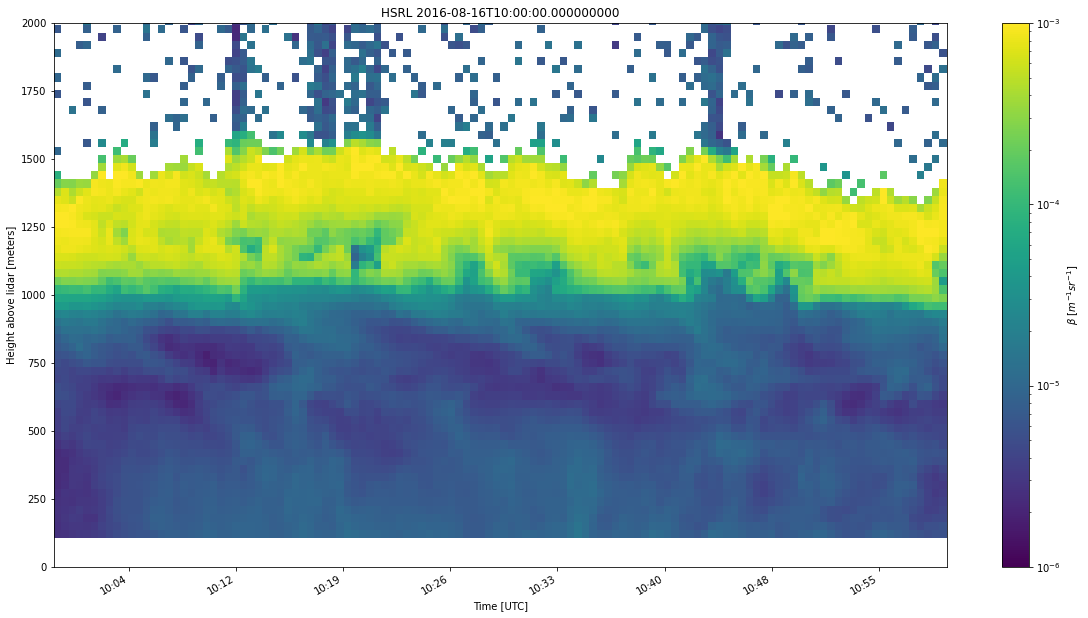

In [7]:
display = emc2.plotting.SubcolumnDisplay(my_model, figsize=(20, 10))
ax, _ = display.plot_instrument_timeseries(HSRL, "beta_a_backscat", log_plot=True, y_range=(0., 2000.),
                                           cmap="viridis", vmin=1e-6, vmax=1e-3,
                                           Mask_array=HSRL.ds["od_aerosol"] > 4.)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
display.fig.savefig('HSRL_backscatter.png', dpi=200)

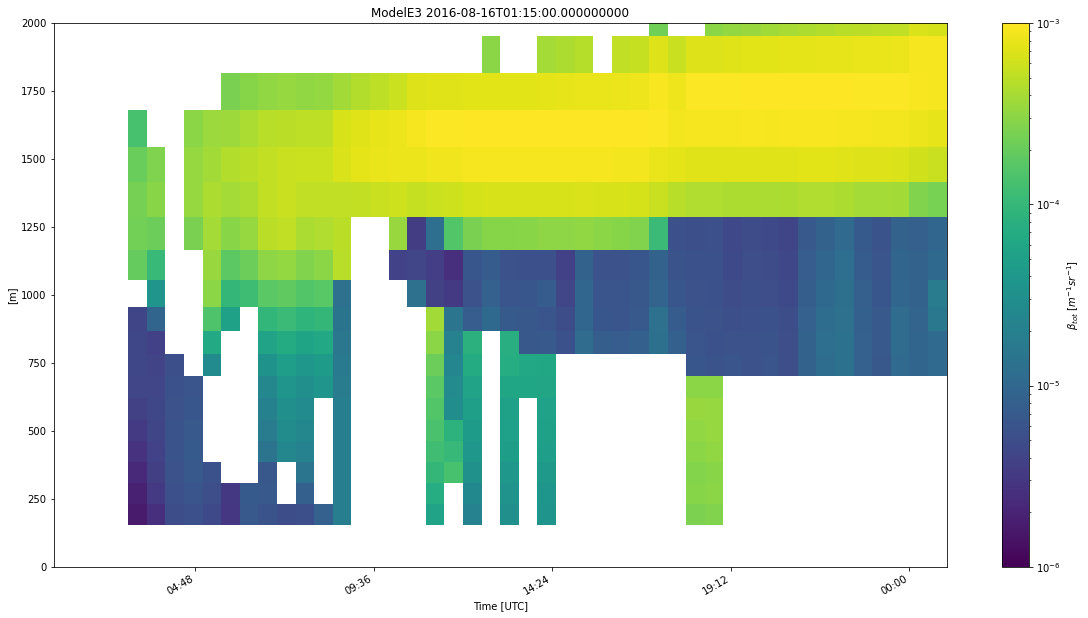

In [8]:
model_display = emc2.plotting.SubcolumnDisplay(my_model, figsize=(20, 10))
ax_mod, _ = model_display.plot_subcolumn_timeseries("sub_col_beta_p_tot", 0, log_plot=True, y_range=(0., 2000.),
                                                 pressure_coords=False, cmap="viridis", vmin=1e-6, vmax=1e-3)
ax_mod.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
display.fig.savefig('HSRL_backscatter_simulated.png', dpi=200)

We can also use $EMC^2$'s SubcolumnDisplay object to generate profile plots with shaded regions designating variable temporal or spatial (based on all subcolumns) standard deviation.

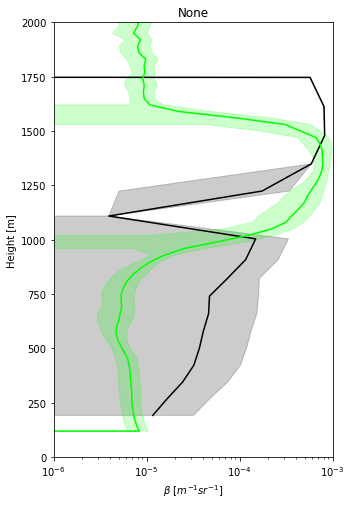

In [9]:
model_display_prof = emc2.plotting.SubcolumnDisplay(my_model, figsize=(5,8))
axp = model_display_prof.plot_subcolumn_mean_profile("sub_col_beta_p_tot", "2016-08-16T10:00:00", log_plot=True,
                                                     y_range=(0., 2000.), x_range=(1e-6, 1e-3), color='black',
                                                     pressure_coords=False, alpha=0.2)
axp = model_display_prof.plot_instrument_mean_profile(HSRL, "beta_a_backscat", log_plot=True,
                                                     Mask_array=HSRL.ds["od_aerosol"] > 4.,
                                                     y_range=(0., 2000.), x_range=(1e-6, 1e-3), color="lime",
                                                     pressure_coords=False, alpha=0.2)
display.fig.savefig('HSRL_backscatter_simulated_profile.png', dpi=200)

Finally, $EMC^2$'s SubcolumnDisplay object also allows easy production of phase classification plots. Here we demonstrate curtain plots of lidar classificaiton for the first subcolumn and frequency phase ratio calculated using all subcolumn data.  

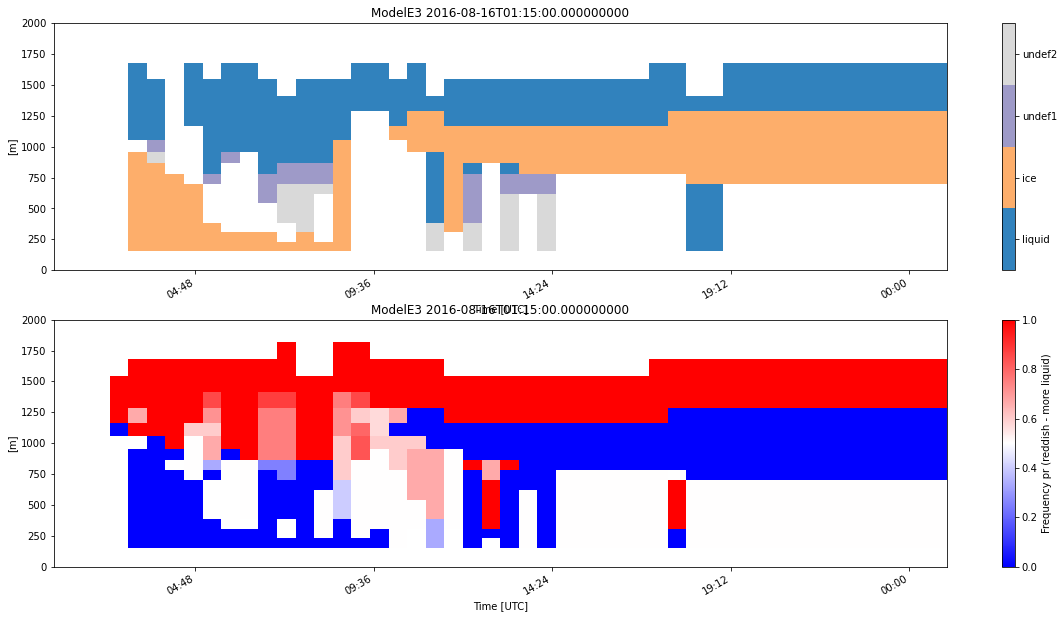

In [10]:
model_display2 = emc2.plotting.SubcolumnDisplay(my_model, figsize=(20,10), subplot_shape=(2, 1))
ax2_1, cb2_1 = model_display2.plot_subcolumn_timeseries("phase_mask_HSRL_all_hyd", 0, y_range=(0., 2000.),
                                                 pressure_coords=False, subplot_index=0)
model_display.change_plot_to_class_mask(cb2_1, variable="phase_mask_HSRL_all_hyd", convert_zeros_to_nan=True)
ax2_1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

my_model = emc2.simulator.classification.calculate_phase_ratio(my_model, "phase_mask_HSRL_all_hyd", [1])
ax2_2, cb2_2 = model_display2.plot_subcolumn_timeseries("phase_mask_HSRL_all_hyd_fpr", 0, y_range=(0., 2000.),
                                                    pressure_coords=False, cmap="bwr", subplot_index=1,
                                                    cbar_label='Frequency pr (reddish - more liquid)')
ax2_2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
display.fig.savefig('HSRL_backscatter_simulated_class.png', dpi=200)